# Chapter3. A Tour of Machine Learning <u>Classifiers</u> Using Scikit-learn

Chapter2에서는 Perceptrons와 Adaptive linear neurons을 이용해 간단한 <u>Classification problem</u>을 다뤄보았다. 

Chapter3에서는 <u>Classification problem</u>을 풀 수 있는     
보다 현대적인 방법론들(logistic regression, SVM, K-nearest neighbors, ...)에 대해 간단하게 다뤄보고     
이런 방법들을 Python의 Machine Learning library인 Scikit-learn을 이용해 구현해볼 것이다.

### Choosing a <u>classification algorithm</u>

그것이 Regression problem이든 Classification problem이든 하나의 문제를 푸는 다양한 방법론이 존재한다.      
앞서 Chapter2에서 iris 데이터를 이용한 분류 문제를 Perceptrons와 Adaptive linear neurons를 이용해 접근해보았는데, 이밖에도 다양한 방법론이 존재한다.

다양한 방법론이 있다면 그냥 가장 좋은 것을 사용하면 되지 않은가? 라고 생각할 수도 있다.

하지만 각 방법론마다 데이터에 대한 다른 조건을 가정하고 있고,     
문제를 풀어가는 방식이 조금식 다르기 때문에     
어떤 데이터에는 좋은 방법이 다른 데이터에는 좋지 않을수도 있는 것이다.   
(여기서 다른 데이터라는 것은 변수(feature)의 수가 다르거나 sample수가 다르거나 noise가 다르거나, 변수간의 관계가 다르다는 식의 다양한 상황이 있을 있다.)

따라서 데이터에 따라 좋은 방법을 잘 골라 쓰는 것이 중요하고,      
분석하려는 데이터에 잘 맞는 방법을 고르는 것도 하나의 테크닉이라 할 수 있다.


### First steps with scikit-learn

다양한 방법론을 소개하면서 이들을 scikit-learn을 이용해 구현해 볼텐데,    

우선 Iris flower 데이터의 분류 문제를           
(Chapter2에서 다뤘던) Perceptrons와 Adaline 방법으로          
scikit-learn을 이용해 구현해보자.

In [1]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
len(X)

150

> 먼저 feature matrix $\mathbf{X}$와 target vector $\mathbf{y}$에 로드 한다.

In [2]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

> 데이터 $[\mathbf{X}:\mathbf{y}]$를 (random하게) training data와 test data로 7:3의 비율로 random하게 나눈다.      

> training data$[\mathbf{X}_{train}:\mathbf{y}_{train}]$는 모형을 학습시키는데 사용되고,         
test data$[\mathbf{X}_{test}:\mathbf{y}_{test}]$는 모형의 성능을 평가하는데 사용된다.          

In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

> 최적의 성능을 위해서는 각 feature들을 **feature scaling**을 하며 다양한 기법 중 **standardization**(표준화)의 경우 아래와 같이 각 변수에서 평균($\mu$)을 빼고 표준편차($\sigma$)로 나눠 정규분포 $N(0, 1)$로 변환한다.
$$x^{'}_j = \frac{x_j - \mu_j}{\sigma_j}$$
> 위에서 sc.fit은 training data의 평균과 표준편차를 구하는 과정이고      
sc.transform을 통해 실제 각 변수마다 표준화된 값이 계산된다.

In [4]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

> 이제 데이터를 사용할 준비가 다 되었다.    
Chapter2에는 Perceptrons를 직접 구현 했었는데,   
이번에는 scikit-learn에 구현되어 있는 것을 사용할 수 있다.   
scikit-learn의 Perceptron 패키지를 사용하는데, 그 사용법은 Chapter2에서 구현한 것과 거의 유사함을 확인할 수 있다.

In [5]:
ppn.classes_

array([0, 1, 2])

In [6]:
ppn.coef_

array([[-0.14874662, -0.11229737],
       [ 0.22431308, -0.20230671],
       [ 0.50351128,  0.28717266]])

> 학습한 모형 파라미터는 아래와 같다.    
target이 3가지인 multi-class classification이므로     
One-vs.-Rest의 모형 3개가 사용되어    
weight쌍이 3개 존재함을 알 수 있다.

In [7]:
y_pred = ppn.predict(X_test_std)
print(len(y_pred))
print(y_pred)
print(y_test)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

45
[2 1 0 2 0 2 0 1 1 1 1 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 0 0 2 1 0 2 2 0 0
 2 1 1 2 0 2 0 0]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0]
Misclassified samples: 4


> 이렇게 (training data로) 학습시킨 Perceptrons 모형을 이용해     
test data에는 어떤 예측을 하는지 살펴보면, 45건중 41건을 잘 예측함을 확인할 수 있다.

> 오분류율(missclassification error rate)이 $4/45 \approx 0.089$임을 알 수 있다.    
혹은 정확도(accuracy)가 $41/45 \approx 0.911$이라고 할 수 있다.

In [8]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.91


###### Overfitting

앞서 training data를 이용해 모형을 학습시킨 후, test data를 이용해 모형의 예측 정확도를 평가 했었다.

만약 어떤 모형이 training data에는 정말 잘 들어맞는데,     
training data가 아닌 다른 데이터에 대해서는 좋은 예측을 하지 못한다면    
이는 좋은 모형이라고 할 수 없다.    
(비유적으로 100번 풀어본 문제는 항상 잘 맞추는데, 새로운 문제는 잘 못 맞춘다면 이는 좋은 학습이라 할 수 없다.)

이처럼 training data에 대해서만 정확한 예측을 하는 상황을 **overfitting**(과적합)이라 하며, 이는 좋은 모형이라 할 수 없다.     
반대로 바람직한 상황으로 test data에도 잘 예측하는 모형을 **generalization**(일반화)이 잘된 모형이라 한다.

###### Decision regions

Chapter2에서 했던 것처럼 각 data sample을 잘 분류하는지 살펴보자.

In [9]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline  

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)
        

    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='',
                   alpha=1.0, linewidth=1, marker='o',
                   s=55, label='test set')
        

In [10]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

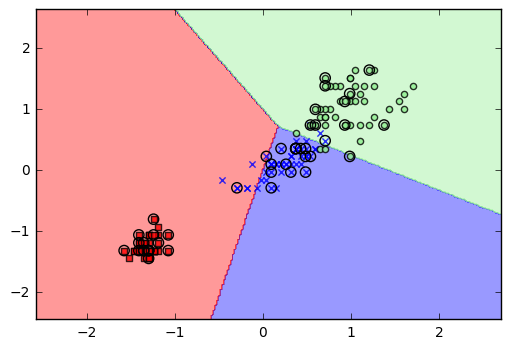

In [11]:
plot_decision_regions(X=X_combined_std,
                     y=y_combined,
                     classifier=ppn,
                     test_idx=range(105,150))

C:\Users\moon\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


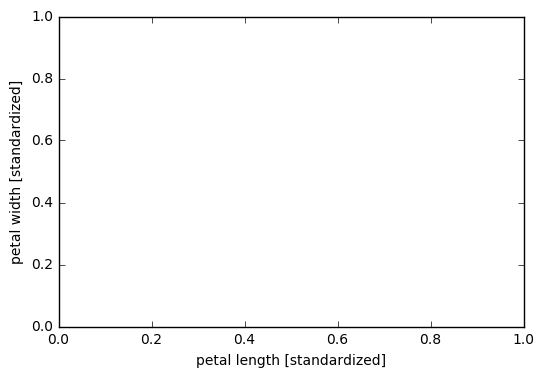

In [12]:
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

### Modeling class probabilities via <u>logistic regression</u>

Perceptrons는 linearly separable하지 않은 데이터에 대해서는 분류가 완전하지 않으며 계속 weight이 바뀌는(수렴하지 않는) 문제를 갖는다.  Classification problem에 있어서 다양한 알고리즘이 있는데, 보다 일반적으로 널리 쓰이는 **Logistic regression**에 대해서 알아보자.

###### <u>Logistic regression</u> intuition and conditional probabilities

선형 회귀(Linear regression)는 target 변수가 연속형인 경우 사용하며 아래와 같이 모형을 세운다.   
$$Y = w_0 x_0 + w_1 x_1 + \dots + w_p x_p + \epsilon, ~~~~ \epsilon \sim N(0, \sigma^2)$$
간단히 말해 $w_j$들을 잘 선택하면 feature($x_j$)들의 가중(weighted)합으로 target($Y$)를 예측할 수 있다는 것이다.

로지스틱 회귀(Logistic regression)은 그 이름과 달리 Classification 방법으로서       
target이 단지 두개의 값을 갖는 경우(이항, binary) 사용하며 그 모형은 아래와 같다.       
(물론 One-vs-Reset로 다항(multinomial) 설계도 가능하다.)

$$logit\left( p(y=1 ~|~ \mathbf{x}) \right) = w_0 x_0 + w_1 x_1 + \dots + w_p x_p = \mathbf{w}^T x$$

결국 선형회귀나 로지스틱 회귀나 feature($x_j$)들의 가중합($ w_0 x_0 + w_1 x_1 + \dots + w_p x_p$)으로 뭔가를 나타내겠다는 공통점을 발견할 수 있다.       

대신 선형회귀에서는 가중합을 입력으로 어떤 연속형의 target을 예측하려는 것 이라면 ($y$가 연속형)      
로지스틱 회귀는 가중합을 입력으로 target값이 성공할 확률을 예측하려는 측면에서 차이가 있다. ($y$가 범주형)     

위 로지스틱 회귀 모형에서 **logit**함수가 등장하는데,      
이는 **log-odds**의 줄임말로서 아래와 같이 '성공확률과 실패확률의 비'(odds-ratio)에 log를 취한 형태이다.

$$logit(p) = log \frac{p}{1-p}$$

feature($x_j$)들의 가중(weighted)합 '$w_0 x_0 + w_1 x_1 + \dots + w_p x_p$'을 $z$라 줄여 쓰면 전체 식은 아래와 같다.

$$log \frac{p}{1-p} = z$$

다시 $p$에 대해 풀어쓰면 아래와 같은 형태가 되며, 이런 함수를 **sigmoid 함수**라 한다.(보다 넓은 의미로 logistic 함수라고도 한다.)
$$\phi(z) = p = \frac{1}{1+e^{-z}}$$

이는 $z$에 대한 함수인데, $z$값에 따라 어떤 값을 함수값을 갖는지 그래프로 확인해보자.

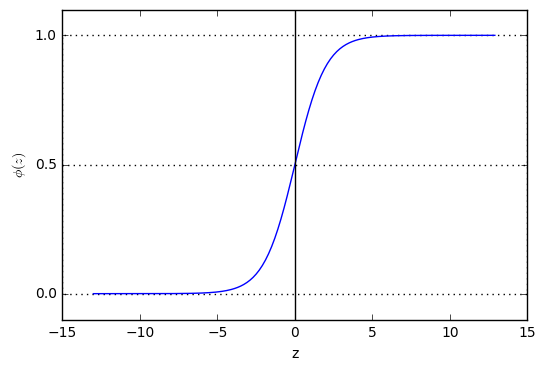

In [13]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-13, 13, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color = 'k')
plt.axhspan(0.0, 1.0, facecolor='1.0', alpha=1.0, ls='dotted')
plt.axhline(y=0.5, ls='dotted', color='k')
plt.yticks([0.0, 0.5, 1.0])
plt.ylim([-0.1, 1.1])
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.show()

그래프에서 확인 할 수 있는 것 처럼,     
$z$값이 0보다 클수록 1에 가까운 함수값을 갖고      
$z$값이 0보다 작을수록 0에 가까운 함수값을 갖는다는 것을 알 수 있다.    
즉 가중합 $w_0 x_0 + w_1 x_1 + \dots + w_p x_p=z$의 값에 따라 target값이 true일 확률($p$)이 높아지거나 낮아진다는 것이다.

Chapter2에서 Perceptrons를 다루면서 등장했던 sign function(unit step function)과 그 역할이 유사한데,    
sigmoid 함수의 경우 미분이 매우 깔끔하게 나오는($\frac{dp}{dz} = p(1-p)$) 등 좋은 특성을 갖기 때문에 널리 사용된다.

---

로지스틱 회귀모형을 Neural network 관점에서 생각해보면    
앞서 다뤘던 Adaline에서는 output layer의 activation function이 $z$에 대한 선형 함수였는데     
이것을 $z$에 대한 sigmoid 함수로 바꾼 것이 바로 로지스틱 회귀모형이라 할 수 있다.

<img  src="./_images/03_adaline_w_sigmoid.PNG"/>

###### Learning the weights of the logistic cost function

$x$값들의 가중($w$)합을 이용해 $p$에 대한 예측 모형을 세울 수 있었다.   
그렇다면 어떤 방법으로 가중치($w$)들을 찾을 수 있을까?

Adaline에서는 최소화 하려는 함수(objective function)로 아래와 같이         
예측값과 실제값의 차이 제곱합을 표현하는 cost function을 사용 했었다.    

$$\begin{align}
J(\mathbf{W}) &= \sum_{i} \frac{1}{2} \left( \hat{y}^{(i)} - y^{(i)} \right)^2 \\
&= \sum_{i} \frac{1}{2} \left( \phi(z^{(i)}) - y^{(i)} \right)^2
\end{align}$$



로지스틱 회귀에서는 조금 다른 방식으로 최소화 하려는 함수(objective function)를 만들게 된다.      
(분류 문제에 위와 같은 접근 방법을 사용해볼수도 있으나 그럴 경우 모형의 성능이 좋지 않다.             
조금 더 자세한 내용은 https://www.quora.com/What-are-the-main-reasons-not-to-use-MSE-as-a-cost-function-for-Logistic-Regression 를 참고)     

모형의 예측값 $p^{(i)}$는 각 data sample의 target 값이 1일 예측 확률을 표현하므로       
$n$건의 데이터 sample들 중 target 값이 1(성공)인 sample에 대해서는 가능한 $p$가 1에 가까운 값으로     
target 값이 0(실패)인 sample에 대해서는 가능한 $p$가 0에 가까운 값으로 예측되면 더 좋은 모형이라 할 수 있다.

따라서 전체 $n$건의 sample을 잘 예측할 결합 확률을 아래와 같이 표현해볼 수 있다.($L(\mathbf{w})$를 likelihood function이라 함)

$$L(\mathbf{w}) = P(\mathbf{y} ~|~ \mathbf{x}; \mathbf{w}) = \prod_{i=1}^n P\left( y^{(i)} ~|~ x^{(i)}; \mathbf{w} \right) = \left( \phi(z^{(i)}) \right)^{y^{(i)}}\left( 1 - \phi(z^{(i)})\right)^{1-y^{(i)}}$$

결국 위 결합 확률이 최대가 된다면 좋은 모형이라 할 수 있다. 그런데 확률값($0 \leq p \leq 1$)들의 많은 곱이므로 연산 과정에서 underflow 문제가 발생할 수 있다. 또한 위 함수 값이 최대가 되는 $w$만 찾으면 되므로 전체 식에 $\mathrm{log}$를 취한 후 이 값이 최대가 되도록 하는 $\mathbf{w}$를 구하는 접근 방법을 취할 수 있다.($\mathrm{log}$함수의 단조증가 특성 때문) ($l(\mathbf{w})$를 log-likelihood function이라 함)



$$l(\mathbf{w}) = \mathrm{log} ~ L(\mathbf{w}) = \sum_{i=1}^n 
~ y^{(i)} ~ \mathrm{log} \left( \phi(z^{(i)}) \right) 
~ + (1-y^{(i)}) ~ \mathrm{log} \left( 1 - \phi(z^{(i)})\right)$$

위 식을 최대화 하는 문제는 $-l(\mathbf{w})$를 최소화 하는 문제와 같으므로     
아래와 같은 objective function을 사용할 수 있다.   

$$\begin{align}
J(\mathbf{w}) &= -l(\mathbf{w}) \\
&= -\mathrm{log} ~ L(\mathbf{w}) \\
&= \sum_{i=1}^n 
 -y^{(i)} ~ \mathrm{log} \left( \phi(z^{(i)}) \right) 
~ - (1-y^{(i)}) ~ \mathrm{log} \left( 1 - \phi(z^{(i)})\right)
\end{align}$$

위 cost function이 어떤 의미인지 생각보자.     
문제를 간단하게 하기 위해 아래와 같이 단 하나의 sample에 대한 likelihood는 아래와 같은데,  

$$J(\phi(z), y;\mathbf{w}) = -y ~ \mathrm{log} \left( \phi(z) \right) 
~ - (1-y) ~ \mathrm{log} \left( 1 - \phi(z)\right)$$

이는 두 부분으로 구성되어 있고       
앞부분($-y ~ \mathrm{log} \left( \phi(z) \right) $)은 실제값이 1일때 0로 예측하는 것에 대한 penalty를 나타내며,       
뒷부분($- (1-y) ~ \mathrm{log} \left( 1 - \phi(z)\right)$)은 실제값이 0일때 1로 예측하는 것에 대한 penalty를 나타낸다.

즉 실제값과의 차이가 커질수록 $J(\phi(z), y;\mathbf{w})$가 증가함을 알 수 있다.

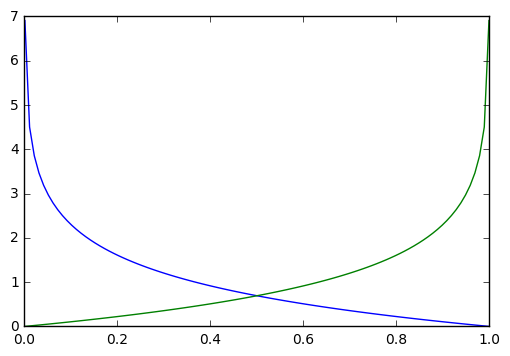

In [14]:
# Ploting cross-entropy(binary case)
def get_y_neg_log(x):  # cost when true output is 1
    return -1 * np.log(x)

def get_y_pos_log(x):  # cost when true output is 0
    return -1 * np.log(1-x)
# plot
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(1/1000, 1 - 1/1000, 100)
y = [get_y_neg_log(i) for i in x]
d = [get_y_pos_log(i) for i in x]
plt.plot(x, y);
plt.plot(x, d);
plt.show()

###### Training a logistic regression model with scikit-learn

결국 최소화 할 cost function이 만들어졌고,        
Chapter2에서 다뤘다시피 gradient descent 등 다양한 방법을 통해        
$J(\mathbf{w})$를 최소화 하는 $\mathbf{w}$를 찾을 수 있다.

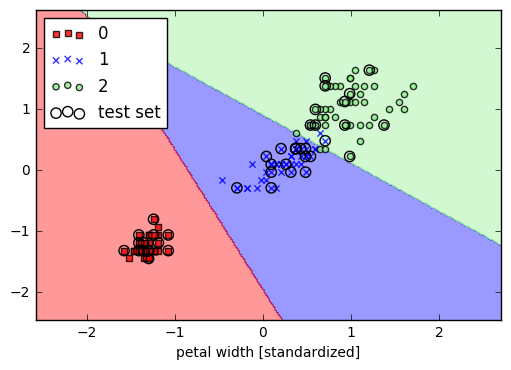

In [15]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000.0, random_state=0)

lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.xlabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

###### (Weight update rule)

앞서 구한 cost function $J(\mathbf{w})$을 이용해 좋은 weight($w_j$)을 찾아가기 위해서는 $\frac{\partial}{\partial w_j} J(\mathbf{w})$를 구해야 한다.

$$\begin{align}
J(\mathbf{w}) &= -l(\mathbf{w}) \\
&= -\mathrm{log} ~ L(\mathbf{w}) \\
&= \sum_{i=1}^n 
 -y^{(i)} ~ \mathrm{log} \left( \phi(z^{(i)}) \right) 
~ - (1-y^{(i)}) ~ \mathrm{log} \left( 1 - \phi(z^{(i)})\right) \\
&\frac{\partial}{\partial w_j} J(\mathbf{w}) = ?
\end{align}$$

우선 $\frac{\partial}{\partial w_j} J(\mathbf{w})$를 구하기 위해 필요한 두가지 조각($\frac{\partial \phi(z)}{\partial z}$, $\frac{\partial z}{\partial w_j}$)을 구해 보자.         
- $\frac{\partial \phi(z)}{\partial z}$는 sigmoid function을 $z$에 대해 미분하여 아래와 같이 '자신'과 '1-자신'의 곱으로 간단하게 정리된다.

$$\begin{align}
\frac{\partial \phi(z)}{\partial z} &= \frac{\partial}{\partial z} \frac{1}{1 + e^{-z}} \\
&= \frac{1}{(1 + e^{-z})^2} e^{-z} \\
&= \frac{1}{1 + e^{-z}} \left( 1 - \frac{1}{1 + e^{-z}} \right) \\
&= \phi(z) (1 - \phi(z))
\end{align}$$

- 또한 $z = w_0 x_0 + w_1 x_1 + \dots + w_p x_p$이므로 $\frac{\partial z}{\partial w_j}$은 아래와 같다.
$$\frac{\partial z}{\partial w_j} = x_j$$

이제  $\frac{\partial}{\partial w_j} J(\mathbf{w})$를 구해보면 아래와 같다.

$$\begin{align}
\frac{\partial}{\partial w_j} J(\mathbf{w}) &= -\sum_{i=1}^n \frac{\partial}{\partial w_j} l(\mathbf{w}) \\
&= -\sum_{i=1}^n \frac{\partial}{\partial w_j} \left[ y^{(i)} ~ \mathrm{log} \left( \phi(z^{(i)}) \right) ~ + (1-y^{(i)}) ~ \mathrm{log} \left( 1 - \phi(z^{(i)})\right) \right] \\
&= - \sum_{i=1}^n \frac{\partial z^{(i)}}{\partial w_j} \frac{\partial \phi(z^{(i)})}{\partial z^{(i)}} \frac{\partial}{\partial \phi(z^{(i)})}\left[ y^{(i)} ~ \mathrm{log} \left( \phi(z^{(i)}) \right) ~ + (1-y^{(i)}) ~ \mathrm{log} \left( 1 - \phi(z^{(i)})\right) \right] \\
&= - \sum_{i=1}^n \frac{\partial z^{(i)}}{\partial w_j} \frac{\partial \phi(z^{(i)})}{\partial z^{(i)}} \left[ y^{(i)} ~ \frac{1}{\phi(z^{(i)})} ~ - (1-y^{(i)}) ~ \frac{1}{1-\phi(z^{(i)})} \right] \\
&= - \sum_{i=1}^n \frac{\partial z^{(i)}}{\partial w_j} ~ \phi(z^{(i)}) ~ (1 - \phi(z^{(i)})) ~ \left[ y^{(i)} ~ \frac{1}{\phi(z^{(i)})} ~ - (1-y^{(i)}) ~ \frac{1}{1-\phi(z^{(i)})} \right] \\
&= -\sum_{i=1}^n x_j^{(i)} ~ \phi(z^{(i)}) ~ (1 - \phi(z^{(i)})) ~ \left[ y^{(i)} ~ \frac{1}{\phi(z^{(i)})} ~ - (1-y^{(i)}) ~ \frac{1}{1-\phi(z^{(i)})} \right] \\
&= -\sum_{i=1}^n x_j^{(i)} ~ \left[ y^{(i)} ~ (1 - \phi(z^{(i)})) - (1-y^{(i)}) ~ \phi(z^{(i)}) \right] \\
&= -\sum_{i=1}^n x_j^{(i)} ~ \left[ y^{(i)} - \phi(z^{(i)}) \right]
\end{align}$$

위 결과를 이용하여 아래와 같은 weight update rule을 구할 수 있다.
$$\begin{align}
w_j &:= w_j + \Delta w_j \\
&=w_j - \eta \frac{\partial}{\partial w_j}J(\mathbf{w}) \\
&= w_j + \eta \sum_{i=1}^n \left( y^{(i)} - \phi( z^{(i)} )\right) x_j^{(i)}
\end{align}$$

###### Tackling overfitting via regularization

**overfitting**이란 training 데이터에만 잘 들어맞고,    
test data 등 새로운 데이터에는 예측력이 좋지 않은 모형의 상태를 말하며    
**high variance**라고 한다.

반면 모형이 매우 복잡도가 낮아서 training 데이터에 잘 들어맞지 않지만   
그렇다고 test data에 대한 성능이 training 데이터에서의 성능과    
크게 다르지 않는 모형의 상태를 **underfitting** 혹은 **high bias**라고 한다.

아래 첫번째 그림의 직선은 **underfitting** 상태로서 모형이 지나치게 단순한 경우이고,   
세번째 그림의 곡선은 **overfitting** 상태로서 모형이 지나치게 복잡한 경우이다.


<img  src="./_images/03_bias_variance.PNG"/>

첫번째 그림과 같은 직선은 $x_2 = w_0 + w_1 x_1$ 2차식으로 표현해 볼 수 있고     
세번째 곡선은 $x_2 = w_0 + w_1 x_1 + w_2 x_1^2 + w_3 w_1^3 + , \cdots , + w_p x_p^p$와 같은 다항함수로 표현해볼 수 있다.

두번째 그림의 곡선과 같이 **overfitting**을 피하고 과유불급의 적절한 곡선을 구하기 위해서     
곡선 $x_2 = w_0 + w_1 x_1 + w_2 x_1^2 + w_3 w_1^3 + , \cdots , + w_p x_p^p$이 데이터에 잘 적합하는 조건과 함께 weight들의 크기가 너무 커지지 않게 제한하는 조건을 줄 수 있다.(weight의 크기가 제한되거나 많은 항들의 weight이 0에 가까워진다면 복잡한 곡선이 직선으로까지 그 복잡도가 줄어들게 된다.)

이런 두가지 조건을 어떻게 줄 수 있을까?    
앞에서는 예측값과 실제값 사이의 차이의 제곱합을 아래와 같은 cost function $J(\mathbf{w})$으로 정의하고, 이 함수의 값이 최소가 되도록하는 $w$를 찾았었다.

> $$\begin{align}
J(\mathbf{w}) &= -l(\mathbf{w}) \\
&= -\mathrm{log} ~ L(\mathbf{w}) \\
&= \sum_{i=1}^n 
 -y^{(i)} ~ \mathrm{log} \left( \phi(z^{(i)}) \right) 
~ - (1-y^{(i)}) ~ \mathrm{log} \left( 1 - \phi(z^{(i)})\right)
\end{align}$$

위 cost function에 $w$의 (절대값)크기를 더하고 이것을 최소화 한다면 어떨까?


> $$\begin{align}
J(\mathbf{w}) &= -l(\mathbf{w}) + \frac{\lambda}{2}||\mathbf{w}||^2\\
&= -\mathrm{log} ~ L(\mathbf{w}) + \frac{\lambda}{2}||\mathbf{w}||^2\\
&= \sum_{i=1}^n 
 -y^{(i)} ~ \mathrm{log} \left( \phi(z^{(i)}) \right) 
~ - (1-y^{(i)}) ~ \mathrm{log} \left( 1 - \phi(z^{(i)})\right) + \frac{\lambda}{2}||\mathbf{w}||^2
\end{align}$$

즉 위 함수값을 최소화 하기 위해서는 실제값과 예측값사이의 차이를 줄이는 동시에        
$w$이 너무 커지지는 않아야 한다는 두가지 조건을 잘 만족하는 $w$를 찾게 되는 것이다.

예를들어 $y = (w-1)^2$를 최소화 하는 $w$는 $1$이지만(아래 파란 선)    
$y = (w-1)^2 + \frac{1}{2}w^2$를 최소로 하는 $w$는 1보다 작은 값이다.(아래 녹색 선)     
즉 녹색 곡선이 최소가 되는 지점은 파란 곡선이 최소가 되는 지점보다 높은 곳에 있지만(cost가 더 크지만)      
$w$가 상대적으로 작기 때문에 overfitting이 다소 완화되었다고 할 수 있다. 

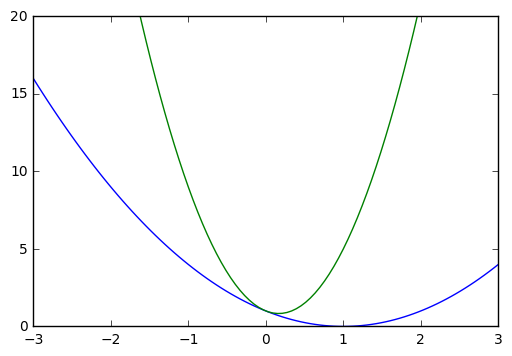

In [2]:
# Ploting cross-entropy(binary case)
def gety1(w):  # cost when true output is 1
    return (w-1) * (w-1)

def gety2(w):  # cost when true output is 0
    lambda_ = 5
    return (w-1) * (w-1) + lambda_* w * w
# plot
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-3 + 1/1000, 3 - 1/1000, 100)
y = [gety1(i) for i in x]
d = [gety2(i) for i in x]
plt.plot(x, y);
plt.plot(x, d);
plt.ylim(0, 20)
plt.show()

이렇게 모형의 복잡도를 제한하는 방법을 정규화(regularization) 혹은 shrinkage, weight decay이라 하며      
흔히 **L1 regularization**과 **L2 regularization**을 사용한다.      
앞서 $\frac{\lambda}{2}||\mathbf{w}||^2$를 $w$에 대한 penalty로 사용 했었는데        
이렇게 $w$의 <u>제곱항</u>을 사용하는 방법을 L2 regularization이라 하며     
$w$의 <u>절대값</u>을 penalty로 사용하는 방법을 L1 regularization이라 한다.

weight에 대한 penalty를 사용하는데 있어서     
데이터에 따라 penalty의 강도를 크게 하여 $w$이 더욱 작아지는 것을 원할수도 있고       
반대로 penalty의 강도를 작게하여 $w$가 어느정도 커지는 것을 원할수도 있을 것이다.

weight penalty의 강도를 조절하기 위해 $\frac{\lambda}{2}||\mathbf{w}||^2$와 같이     
어떤 상수($\lambda$)를 곱해 penalty term으로 사용하는데 이런 변수를 regularization parameter라 하며       
상황에 따라 그 값의 역수($\frac{1}{\lambda}$)를 $C$라는 변수로 사용하기도 한다.    
(scikit-learn의 LogisticRegression class에서는 $C$를 사용함)

> 아래와 같이 $C = \frac{1}{\lambda}$값을 -5에서 5까지 변화시키면서 각각의 경우 $w$(petal length, petal width)값이 어떻게 변하는지 관찰할 수 있다.       
즉 $C$가 커질수록 $w$에 대한 penalty가 작아지기 때문에 $w$의 (절대)값이 커짐을 확인할 수 있다.

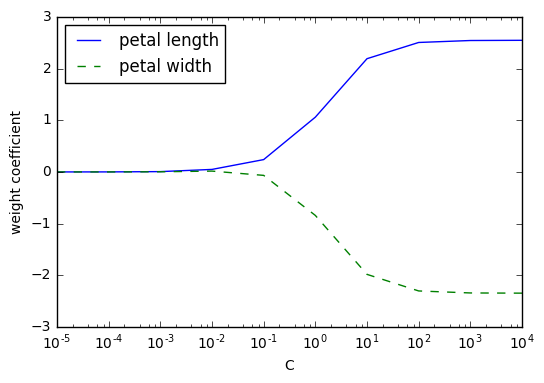

In [33]:
weights, params = [], []
for c in range(-5, 5):
    lr = LogisticRegression(C=10**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)
#plt.autoscale()
plt.plot(params, weights[:, 0], label='petal length')
plt.plot(params, weights[:, 1], linestyle='--', label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

---

### Support Vector Machines

■ SVM은 1990년대 Vladimir Vapnik이 제안한 방법으로서 Classification 혹은 Regression 문제에 있어서 계산 효율이나 그 성능이 매우 좋은 방법론 중의 하나라고 할 수 있다. 

여기에서는 3가지 단계로 SVM에 대해 알아볼 것이다.
1. Maximal margin classifier
2. Support vector classifier
3. Support vector machine  

(아래 설명할 내용은 'An Introduction Statistical Learning'의 Chapter 9 을 참고함)

###### 1. Maximal margin classifier

<u>1-1. 초평면(Hyperplane) 이란?</u>

■ 직선을 둘로 나누는 점,   
평면을 둘로 나누는 직선,   
3차원 공간을 둘로 나누는 어떤 평면,    
4차원 공간에서도 공간을 둘로 나누는 어떤 3차원의 무엇인가를 생각해볼 수 있는데,   
이렇게 $p$차원 공간을 둘로 나누는 $p-1$차원의 어떤 공간(affine)을 hyperplane이라 한다.

■ 논의의 편의를 위해 2차원 공간에서만 생각해 보면     
2차원 공간의 한 점은 하나의 데이터 포인트라 할 수 있고         
어떤 직선(hyperplane)에 의해 이 직선 위의 점들과 아래의 점들로 데이터 포인트 들은 두개의 그룹으로 나뉘게 된다. 

2차원 공간에서의 한 점 $x_i$는 아래의 열벡터로 표현할 수 있고
$$x_i = \left( \begin{array} {a} x_{i1} \\ x_{i2} 
 \end{array} \right)$$

2차원 공간상의 직선은 아래와 같이 표현할 수 있다.

$$\beta_0 + \beta_1 X_1 + \beta_2 X_2 = 0$$

<img  src="./_images/03_svm2.PNG"/>

이 직선은 위 그림과 같이 평면위의 점들을 파란 점들과 빨간 점으로 나눌 수 있는데    

- 직선위의 점들은 $\beta_0 + \beta_1 X_1 + \beta_2 X_2 = 0 $을 만족시키시고
- 파란 점들은 직선 위에 있으므로 $\beta_0 + \beta_1 X_1 + \beta_2 X_2 > 0 $을 만족시키는 점들이며    
- 빨간 점들은 직선 아래에 있으므로 $\beta_0 + \beta_1 X_1 + \beta_2 X_2 < 0$을 만족시키는 점들이다.

또한 직선으로부터 멀어질 수록 그 값은 0과의 차이가 커지게 된다.

이런 특성을 이용하여 어떤 직선이 주어져 있을 때    
특정 점이 직선 상에 위치하는지 혹은 직선 위/아래 그리고 위/아래에 있다면 얼마나 떨어져 있는지를 알 수 있다.

> 2차원 공간상에서의 논의는 $p$차원 공간으로 확장하여    
$p$차원에서의 hyperplane은 아래와 같이 나타낼 수 있고   
앞서 설명한 특성들이 모두 동일하게 적용된다.

$$\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_p X_p = 0$$

<u>1-2. 초평면을 이용한 분류</u>

■ 예를들어 특정 시점 기준 일주일 이내 이탈하거나 이탈하지 않은 유저 $n$명의    
젬-소비지수($X_1$)와 던전-실패지수($X_2$)이라는 특성(feature)을 조사했다고 하자.    

feature가 두개 이므로  $n \times 2$의 matrix이고 2차원 상의 $n$개의 점으로 나타낼 수 있는데    
이탈한 유저들은 파란색으로, 그렇지 않은 유저들은 붉은 색으로 표시했다고 하자.

이 두가지 특성($X_1, X_2$)에 따라 유저들이 이탈이 극명하게 두 그룹($G_1, G_2$)으로 나뉜다고 **가정**하면     
2차원상의 $n$개의 점을 나누는 어떤 직선을 생각해볼 수 있다.

그런데 아래 그림과 같이 주어진 데이터에 대해 두 그룹을 정확히 나누는 직선은 무수히 많을 수 있다.     
조사 대상에 포함되지 않은 새로운 유저에 대해서도 이 직선을 기준으로 좋은 예측 할 수 있다면 그 직선은 최적의 직선이라 할 수 있다.    
만약 아래 우측 그림의 직선이 그 정답이라면, 어떻게 이 직선에 가까운 직선을 어떻게 찾을 수 있을까?

<img  src="./_images/03_svm3.PNG"/>

■ 위와 같은 최적의 직선을 찾았고 만약 그 직선이 $\beta_0 + \beta_1 X_1 + \beta_2 X_2 = 0 $이라면      
새로운 유저($\mathbf{X}_k$)의 특성($X_{k1}, X_{k2}$)을 위 직선에 대입하여        
그 값($\beta_0 + \beta_1 X_{k1} + \beta_2 X_{k2}$)이 0보다 크다면 이 유저는 $G_1$에 속하는 것으로    
반대로 0보다 작다면 $G_2$에 속하는 것으로 유저를 분류 할 수 있을 것이다.

또한 유저의 특성이 직선에 가깝다면 그 유저는 반대 그룹과 특성상 큰 차이가 없다고 할 수 있고    
직선에서 멀리 떨어져 있다면 특성이 분명한 유저라고 판단할 수 있을 것이다.  
수학적으로는 직선에 가깝다는 것은 $\beta_0 + \beta_1 X_{k1} + \beta_2 X_{k2}$ 값이 0에 가깝다는 것이고   
직선에서 멀다는 것은 $\beta_0 + \beta_1 X_{k1} + \beta_2 X_{k2}$값이 0과 멀리 떨어져 있다는 것이다.(법선 벡터와의 내적)

<u>1-3. Maximal Margin Classifier란 무엇인가?</u>

■ 앞서 좌측 그림에서와 같이 데이터 점들이 어떤 hyperplane(앞서의 직선)에 의해 확실히 나뉠 수 있다면        
이런 hyperplane은 무수히 많다고 할 수 있다. (조금식 움직일 수 있으므로)

그렇다면 이렇게 많은 hyperplane중 어느 것이 최적의 선택일 할 수 있을까?  

많은 hyperplane중 인접한 데이터 점과의 수직 거리가 가장 먼 것을 고르겠다는 아이디어가 바로 **maximal margin classifier**이고,        
그 hyperplane을 **maximal margin hyperplane**이라 한다.         
(보다 엄밀하게 하나의 직선과 $n$개의 데이터 점이 있다면 이 직선과 각 점과의 거리는 $n$가지인데, 이들 중 가장 짧은 거리를 **margin**이라 한다.         
또한 **maximal margin hyperplane**이란 $n$개의 데이터 점과의 **margin**이 최대가 되는 직선을 말한다.)

앞서 예로 들었던 이탈자 데이터에서는 아래와 같은 (검은)직선이 바로 maximal margin hyperplane이라 할 수 있다.      
(검은)직선 위쪽과 아래쪽의 점선은 margin을 표현하고 있다.       

그런데 maximal margin hyperplane를 결정함에 있어서 인접한 점과의 거리가 최대가 된다는 조건만 있기 때문에      
margin 밖에 있는 점들은 maximal margin hyperplane의 위치에 어떠한 영향도 주지 못함을 알 수 있다. 

반면 직선에서 margin만큼 떨어진 점 3개는 maximal margin hyperplane을 직접 결정함을 알 수 있다.      
이렇게 maximal margin hyperplane을 결정하는데 영향을 주는 데이터 점을 **support vector**라 한다.

<img  src="./_images/03_svm4.PNG"/>

<u>1-4. Maximal Margin Classifier를 구하는 방법</u>

■ $n$건의 데이터 점 $x_1, \dots, x_n \in \mathbb{R}^p$과 각각의 데이터 점에 해당하는 label $y_1, \dots, y_n \in \{-1, 1\}$이 있을 때,           
이들을 확실히 둘로 나누는 공간(2차원에서는 직선) Maximal margin hyperplane은 아래 최적화 문제의 '해' 이다.

$$\begin{align}
& \operatorname{maximize}_{\beta_0, \beta_1, \dots, \beta_p} M \\
& \operatorname{subject to} \sum_{j=1}^{p} \beta^2_j = 1 \\
& y_i (\beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \dots + \beta_p x_{ip} ) \geq M ~~ \forall i = 1, \dots, n.
\end{align}$$

위 식은 그 생김새 보다 간단한 의미를 담고 있다.      
간단하게 2차원 공간(평면)에서 생각해보면        
식은 아래와 같이 정리된다.   
(데이터 1건에 대해서만 볼 것이며, $\beta_0 = 0$이고 $y=1$이라 가정하자.)

$$\begin{align}
& \operatorname{maximize}_{\beta_1, \beta_2} M \\
& \operatorname{subject to} \beta^2_1 + \beta^2_2 = 1 \\
& \beta_1 x_{1} + \beta_2 x_{2} \geq M ~~ 
\end{align}$$

또한 평면에 아래 그림과 같이 표현해 볼 수 있고, 각각의 의미는 아래와 같다.

- 검은 직선: maximal margin hyperplane, $\beta_1 x_1 + \beta_2 x_2 = 0$
- 빨간 직선: maximal margin hyperplane의 법선 vector, ($\beta_1, \beta_2$)
- 파란 점  : 데이터 점, ($x_1, x_2$)
- 녹색 점선: ($x_1, x_2$)의 ($\beta_1, \beta_2$)에 대한 정사영 혹은 maximal margin hyperplane와의 거리

결국 $\beta^2_1 + \beta^2_2 = 1$라는 조건을 만족시키면서 $\beta_1 x_{1} + \beta_2 x_{2}$를 최대화 하는 ($\beta_1, \beta_2$)를 찾는 문이고

 $\beta_1 x_{1} + \beta_2 x_{2}$는 벡터 ($\beta_1, \beta_2$)과 벡터 ($x_1, x_2$)의 내적으로서        
$\beta^2_1 + \beta^2_2$을 1로 제한 했으므로 내적의 값은 점 ($x_1, x_2$)과 평면(검은 직선)과의 거리가 된다.   
즉  $\beta_1 x_{1} + \beta_2 x_{2} = M$의 값은 아래 그림의 녹색 점선의 길이와 같다.

따라서 파란 점과 직선과의 거리가 최대가 되도록 멀어지도록 법선 벡터 ($\beta_1, \beta_2$)를 정하면 되는 것이다.    
(다만 여기에서는 데이터 점 하나에 대해서만 고려 한 것이고,     
$n$건의 데이터 점에 대해 $y_i$의 조건을 만족시키며 그 거리가 최대가 되는 ($\beta_1, \beta_2$)를 찾아야 한다.)

<img  src="./_images/03_svm5.PNG"/>

<u>1-5. 분류가 불가능한 상황</u>

■ 앞서 다뤘던 데이터는 다행히도 직선(선형 공간)으로 예외 없이 두 그룹으로 나뉘는 경우 였으나     
아래 그림과 같이 현실에서의 문제는 그렇게 쉽게 둘로 나뉘지 않는 경우가 많을 것이다.

즉 앞서의 최적화 문제는 아래 데이터에 대해 그 해가 존재하지 않는다.

<img  src="./_images/03_svm6.PNG"/>

###### Support Vector Classifiers

<u>2-1. Support Vector Classifier란?</u>

 ■ maximal margin classifier에서는 예외 없이 정확히 나누는 hyperplane을 찾는 방법이라서    
 예외가 존재하는 경우 조건을 만족시키는 hyperplane을 찾을 수 없는 문제가 발생한다.   
 
 또한  maximal margin hyperplane이 존재하더라도 hyperplane에 인접한 점의 위치에 따라 hyperplane의 위치가 지나치게 민감하게 반응한다. 아래 그림을 보면 좌측의 원래 hyperplane(검은 직선)이 있고, 우측과 같이 새로운 데이터가 추가되었을 때 그 새로운 점의 유의미한지 아닌지에 무관하게 hyperplane의 위치가 급격히 바뀌게 된다.

<img  src="./_images/03_svm7.PNG"/>

그렇다면 꼭 예외 없이 모든 데이터 점을 분류 하기 보다는     
모형이 일반적으로 좋은 성능을 갖기 위해 몇건 정도는 틀릴 수도 있어도 괜찮고    
가끔 발생하는 특이값에 크게 좌우되지 않는 어떤 직선을 찾는 다면 더 좋을 것이다.


즉 앞서 다뤘던 [Maximal Margin Classifier]의 조건을 일부 완화하여     
몇 건 정도는 margin 안에 들어올 수도 있고      
심하게는 몇건 정도는 hyperplane 경계를 넘어설수도 있는 hyperplane을 생각해볼 수 있고   
이런 아이디어를 구체화 한 것이 바로 **support vector classifier**이다.

<u>2-2. Support Vector Classifier를 구하는 방법</u>

■ [1-4. Maximal Margin Classifier를 구하는 방법]의 최적화 문제는 아래와 같고

$$\begin{align}
& \operatorname{maximize}_{\beta_0, \beta_1, \dots, \beta_p} M \\
& \operatorname{subject to} \sum_{j=1}^{p} \beta^2_j = 1 \\
& y_i (\beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \dots + \beta_p x_{ip} ) \geq M ~~ \forall i = 1, \dots, n.
\end{align}$$

여기에 앞서 설명했던 조건을 추가하여 **Support Vector Classifier**를 아래와 같은 최적화 문제로 정식화 할 수 있다.

$$\begin{align}
& \operatorname{maximize}_{\beta_0, \beta_1, \dots, \beta_p} M \\
& \operatorname{subject to} \sum_{j=1}^{p} \beta^2_j = 1 \\
& y_i (\beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \dots + \beta_p x_{ip} ) \geq M(1 - \epsilon_i) ~~ \forall i = 1, \dots, n. \\
& \epsilon_i \geq 0, ~~ \sum_{i=1}^n \epsilon_i \leq C,
\end{align}$$

Maximal Margin Classifier와의 차이점은 $M$이 $M(1 - \epsilon_i)$으로 바뀐 부분인데      
이는 데이터 점이 margin $M$만큼 떨어져 있어야 한다는 조건이 $M(1 - \epsilon_i)$만큼 떨어져 있어도 된다는 것으로 바뀐 것이다.  

뒤에 추가된 $\epsilon_i \geq 0, ~~ \sum_{i=1}^n \epsilon_i \leq C$는 예외를 허용하되 그 정도를 $C$로 제한하겠다는 것이다.           
(예외가 너무 많다면 당연히 좋은 모형일 수 없기 때문이다.)

※ $\epsilon_i$가 모두 0 이라면 이는 Maximal Margin Classifier와 같게 되고          
$~~~~$ 0과 1 사이 값이라면 데이터 점이 margin과 hyperplane 사이에 있는 것이고   
$~~~~$ 1보다 큰 값이라면 데이터 점이 오분류 되어 hyperplane을 넘어선 것이다.

※ 큰 값의 $C$를 사용한다면 이는 예외를 많이 허용하겠다는 것이고 그만큼 모형은 느슨하며 under-fitting 가능성이 커진다.      
$~~~~$반면 작은 $C$값을 사용한다면 예외가 작아지며 모형은 over-fitting할 가능성이 커지게 된다.

(참고로 책(Python Machine Learning)에서 소개된 $\mathbf{C}$값은 지금 말하는 $C$값의 역수로서 그 특성이 반대이다. $\mathbf{C} \propto \frac{1}{C}$)

■ 적절한 $C$값을 찾는 것은 좋은 모형을 결정하는데 있어서 매우 중요한 요소인데,          
아래 그림과 같이 다양한 C값에 대한 모형의 변화를 확인할 수 있다.    
(좌측 상단부터 우측 하단으로 점차 작은 $C$값을 사용한 것임)

<img  src="./_images/03_svm8.PNG"/>

■ (SVM을 포함하여) support vector classifier는      
margin과 hyperplane 사이의 점들(support vector)만이    
support vector classifier를 결정함하는데 영향을 주는 특성때문에     
hyperplane으로부터 먼 점들의 변화에 매우 강건한 장점하고,  
결국 support vector들만을 이용해 hyperplane을 계산할 수 있기 때문에 계산 효율성이 매우 좋다.

이런 특성은 로지스틱 회귀와 유사한 부분이 있다.      
아래 그림과 같이 SVM과 로지스틱 회귀의 loss function은 그 형태가 유사하며         
경계로부터 먼 '정'분류 데이터에 대해서는 거의 미미한 loss를 부여하고 있다.

이런 유사성 때문에 SVM과 로지스틱 회귀는 비슷한 결과를 내놓는 경우가 많으며    
범주간 분류가 명확한 경우 SVM 이용하면  로지스틱 회귀보다 다소 좋은 결과를 얻게되는 경향이 있다.       
(※ SVM Loss를 hinge loss라고도 함)

<img  src="./_images/03_svm9.PNG"/>

###### Support Vector Machines

<u>3-1. 비선형 방법을 이용한 분류</u>

지금까지 설명했던 **maximal margin classifier**나 **support vector classifier**의 경우 선형 분류기로서     
2차원에서는 직선, 2차원에서는 평면을 이용해 분류를 시도한다.      
그런데 현실의 많은 문제들은 이처럼 선형 분류가 불가능하거나 좋은 결과를 얻지 못하는 경우가 많다.

예를들어 아래 좌측의 데이터를 우측과 같이 support vector classifier를 사용해 분류할 수 있는데, 그 분류가 엉망임을 알 수 있다. 

<img  src="./_images/03_svm10.PNG"/>

또 다른 예로 아래 좌측의 그림의 경우 가운데 파란 점들과 외곽의 붉은 점들을 나누는 직선을 찾을 수는 없다. 이를 해결하는 아이디어로 기존의 $X_1, X_2$ 공간에 $X_1^2 + X_2^2$를 값으로 하는 $Z_3$ 축을 추가하여 3차원 공간으로 데이터를 확장해 볼 수 있다. 원의 중심에서 먼 점들은 더 큰 $X_1^2 + X_2^2$값을 갖을 것이므로 그 결과는 아래 우측 상단 그림과 같고 이 경우 평면을 이용해 데이터를 두 그룹으로 쉽게 나눌 수 있게 된다. 

<img  src="./_images/03_svm11.PNG"/>

이처럼 데이터 공간에 2차항 혹은 3차항 등을 추가하여, 데이터 공간의 차원을 확장하면 확장된 공간에서는 선형 방법론을 이용해 분류 문제가 해결될 수 있다. (위 우측 하단의 그림과 같이 결과적으로 다시 본래의 데이터 차원으로 돌아올 경우 이는 비선형 분류의 효과를 갖는다.)

<u>3-2. Support Vector Machine이란</u>

■ **SVM(Support Vector Machine)**이란 non-linear kernel을 이용해 차원 확장을 하고     
support vector classifier으로 분류하는 방법을 말한다.

■ kernel에 대해 알아보기 위해 우선 벡터 내적에 대해서 알아보자.    
길이가 3인 두 벡터 $\mathbf{x_1}=(x_{11}, x_{12}, x_{13})$와 $\mathbf{x_2}=(x_{21}, x_{22}, x_{23})$의 내적은 아래와 같고     
여기에서는 축약하여 $<\mathbf{x_1}, \mathbf{x_2}>$로 표현한다.
$$\begin{align} <\mathbf{x_1}, \mathbf{x_2}> &= x_{11} x_{21} + x_{12} x_{22} + x_{31} x_{32} \\
&=\sum_{j=1}^3 x_{1j} x_{2j}
\end{align}$$

그런데 앞서 (linear) support vector classifier이 어떤 최적화 문제의 '해'라고 했었고,    
그 해는 아래와 같이$p$차원 벡터 $\mathbf{x}$와 각 데이터 점 벡터 $\mathbf{x_i}$과의 내적을 합한 형태로 정리된다.   
(중간 과정에 대한 설명은 생략한다.)
$$f(x) = \beta_0 + \sum_{i=0}^n \alpha_i \left<x, x_i \right>$$

■ 결국 내적이 support vector classifier의 계산에 포함되는데,    
이 내적을 내적 혹은 다른 형태의 함수 $K(x_i, x_{i'})$으로 대체할 수 있고    
바로 이 $K(x_i, x_{i`})$를 **kernel**이라 부른다.

- 앞서 등장했던 내적은 아래와 같은 kernel이라 할 수 있고,          
linear kernel이라 부르며 이 kernel을 사용할 경우 그 결과는 support vector classifier와 같다.
$$K(x_i, x_{i'}) = \sum_{j=1}^p x_{ij} x_{i'j}$$

- 아래와 같은 저듭제곱 형태의 kernel은 polynomial kernel이라 부르며, $d=2$일 경우 앞서 예로 들었던 것과 같이 변수들의 제곱항을 추가하는 것과 같은 효과가 있다.
$$K(x_i, x_{i'}) = \left( 1 + \sum_{j=1}^p x_{ij} x_{i'j} \right)^d$$

- 아래와 같은 형태의 kernel도 빈번히 사용하며 radial kernel이라 부른다.
$$K(x_i, x_{i'}) = \mathrm{exp} \left( -\gamma \sum_{j=1}^p (x_{ij} - x_{i'j})^2 \right)$$

■ 앞서 분류에 어려움을 겪었던 데이터에     
polynomial kernel을 이용한 SVM으로 분류한 결과가 아래 좌측의 그림과 같고     
radial kernel을 이용한 SVM 분류 결과아 아래 우측과 같다.

<img  src="./_images/03_svm12.PNG"/>

###### <u>Implementation using sklearn</u>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from matplotlib.colors import ListedColormap
%matplotlib inline  

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)
        

    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='',
                   alpha=1.0, linewidth=1, marker='o',
                   s=55, label='test set')

        

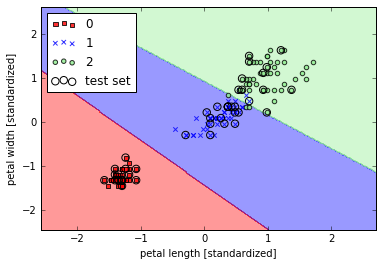

In [7]:
svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

In [8]:
from sklearn.linear_model import SGDClassifier
ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')

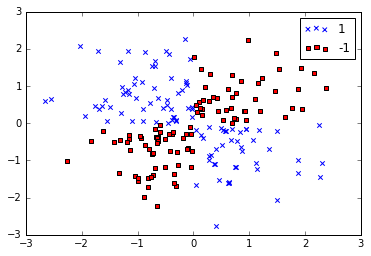

In [9]:
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)
plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor==-1, 0], X_xor[y_xor==-1, 1], c='r', marker='s', label='-1')
plt.ylim(-3.0)
plt.legend()
plt.show()

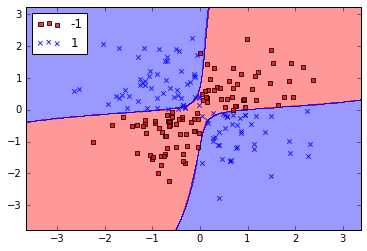

In [19]:
# rbf = Radial Basis Function kernel
# poly = Polynomial kernel
svm = SVC(kernel='rbf', random_state=0, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.show()

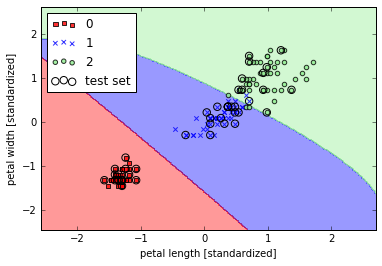

In [10]:
svm = SVC(kernel='rbf', random_state=0, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

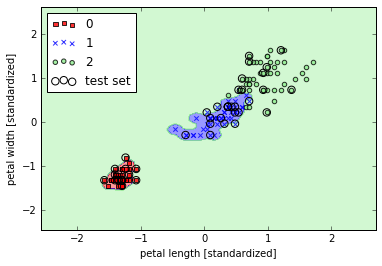

In [18]:
svm = SVC(kernel='rbf', random_state=0, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

---